# Exercice : convolution pour le calcul d'une probabilité - Solution


## Solution

In [1]:
import openturns as ot
import numpy as np

On utilise d'abord la méthode fondée sur l'arithmétique des distributions.

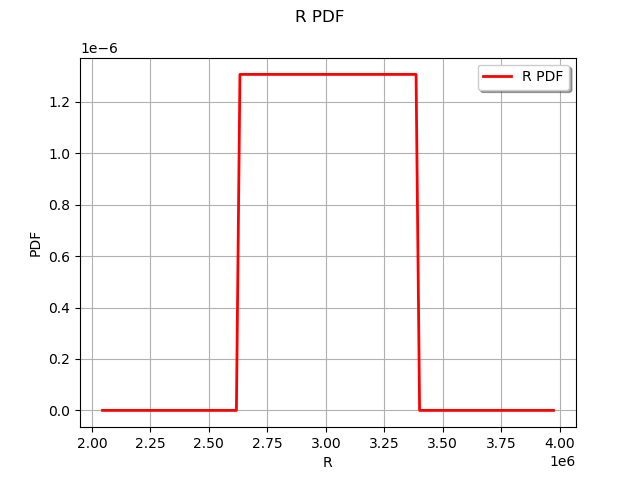

In [2]:
R = ot.Uniform(2.627e6,3.392e6)
R.setDescription("R")
R.drawPDF()

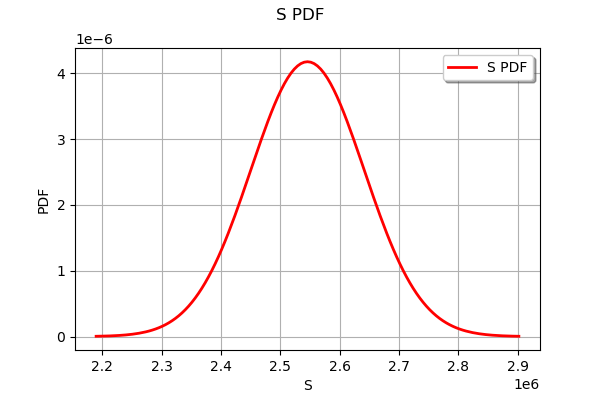

In [3]:
S = ot.Normal(2.546e6, 0.09549e6)
S.setDescription('S')
S.drawPDF()

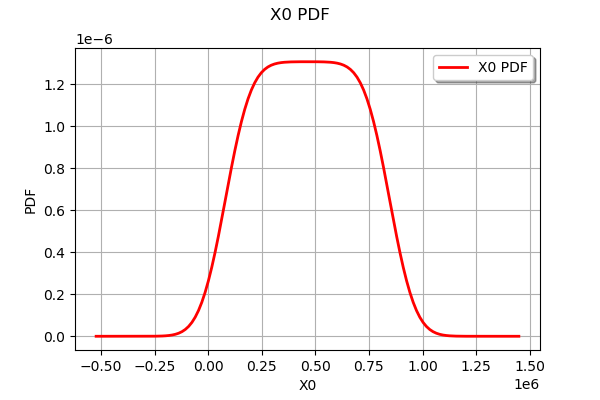

In [4]:
Z = R - S
Z.drawPDF()

On observe que la loi de la différence $R-S$ possède le plateau correspondant à la variable uniforme de $R$ et les bords arrondis correspondants à la loi gaussienne de $S$. 

In [5]:
z = 0.
d1 = Z.computeCDF(z)
d1

0.013770132229198428

On utilise ensuite la méthode fondée sur le produit de convolution.

In [6]:
def gbase(s):
    c = R.computeCDF(z+s[0]) * S.computePDF(s[0])
    return [c]
g = ot.PythonFunction(1,1,gbase)

In [7]:
# Check
y = ot.Point([2.7e6])
print(gbase(y))
print(g(y))

[1.0860072814677517e-07]
[1.08601e-07]


In [8]:
gkr = ot.GaussKronrodRule(ot.GaussKronrodRule.G11K23)
algo = ot.GaussKronrod(500, 1e-8, gkr)
bounds = ot.Interval(0.e6, 9.e6)
d2 = algo.integrate(g, bounds)[0]
d2

0.013770132648617251

Pour comparer les deux résultats on évalue l'erreur relative, que l'on convertit en nombre de chiffres communs.

In [9]:
import numpy as np
re = abs(d1-d2)/abs(d1)
print(re)
cd = -np.log10(re)
print(cd)

3.045859078243858e-08
7.516290193894542


On observe que les deux calculs possèdent 7 chiffres communs. Ce résultat est cohérent avec l'erreur absolue que nous avons utilisée dans la règle de Gauss-Kronrod.

## Note : calcul des paramètres équivalents de la loi log-normale pour R

Dans la cellule suivante, on calcule les quantiles de la loi log-normale associée à R. Cela permet de déterminer les paramètres de la loi uniforme que l'on va utilise dans le sujet.

In [10]:
RLN = ot.LogNormalMuSigma(3.e6, 3.e5, 0.0).getDistribution()
print(RLN.computeQuantile(0.1)[0]/1.e6)
print(RLN.computeQuantile(0.9)[0]/1.e6)

2.626889983635516
3.3921828263156204


In [11]:
muF = 750.
sigmaF = 50.
FN = ot.Normal(muF, sigmaF)

In [12]:
Y = FN/(1.e-4*np.pi)
print(Y)

RandomMixture(Normal(mu = 2.38732e+06, sigma = 159155))


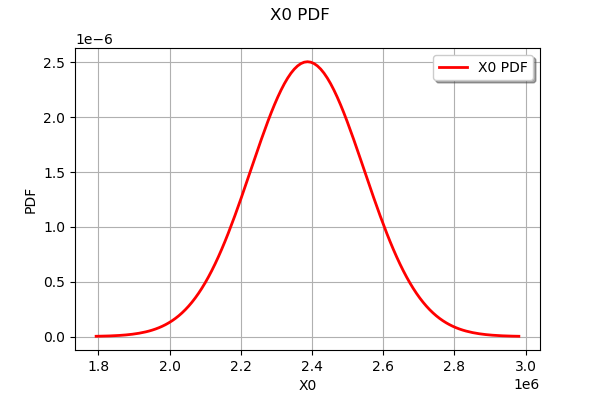

In [13]:
Y.drawPDF()

In [14]:
D = 0.02
muS = muF/(np.pi*D**2/4.)
print(muS/1.e6)
sigmaS = sigmaF/(np.pi*D**2/4.)
print(sigmaS/1.e6)

2.3873241463784303
0.15915494309189535


## Note : calcul des paramètres équivalents pour la variable S

Puis on calcul les paramètres de la loi $S$ associée à la gaussienne correspondant à la force. Dans le sujet orginal, on considère $F/(\pi D^2/4)$. 

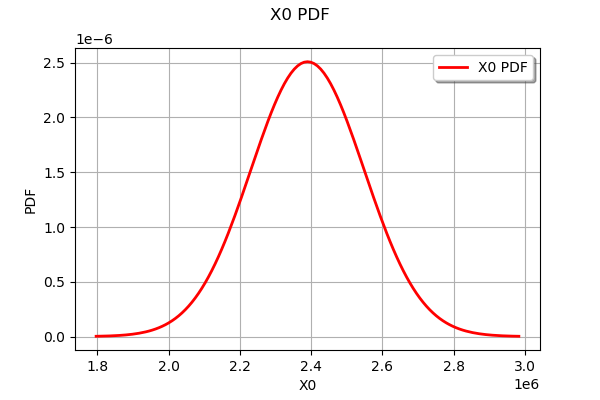

In [15]:
SN = ot.Normal(2.387e+6, 0.159e6)
SN.drawPDF()

In [16]:
D = 0.02
muF = 800.
sigmaF = 30.

In [17]:
muS = muF/(np.pi*D**2/4.)
muS/1.e6

2.5464790894703255

In [18]:
sigmaS = sigmaF/(np.pi*D**2/4.)
sigmaS/1.e6

0.09549296585513721